# Analysis - NATICUSdroid

*by : Zahrizhal Ali*in)

# Import Packages

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve
from tensorflow import keras
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

# Dataset Preparation

📚 Data berisi izin yang diambil dari lebih dari 29.000 aplikasi Android, termasuk aplikasi jinak (tidak berbahaya) dan malware (berbahaya). Aplikasi ini dirilis antara tahun 2010 dan 2019.

## Read Dataset

In [4]:
df_train = pd.read_csv('data/training.csv')
df_test = pd.read_csv('data/testing.csv')

In [5]:
print(f"Jumlah data train: {len(df_train)} data")
print(f"Jumlah data test: {len(df_test)} data")

print(f"\nJumlah column data Train {len(df_train.columns)}")
print(f"Jumlah column data Test {len(df_test.columns)}")

Jumlah data train: 20531 data
Jumlah data test: 8799 data

Jumlah column data Train 88
Jumlah column data Test 87


In [6]:
# Drop unnecessary Column
df_train = df_train.drop('index', axis=1)
df_test = df_test.drop('index', axis=1)

## Dataset Train Info

📝**Note** Looking at the entire column attribute we can infer that there is no missing value since the total rows was 20531.

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20531 entries, 0 to 20530
Data columns (total 87 columns):
 #   Column                                                                         Non-Null Count  Dtype
---  ------                                                                         --------------  -----
 0   android.permission.GET_ACCOUNTS                                                20531 non-null  int64
 1   com.sonyericsson.home.permission.BROADCAST_BADGE                               20531 non-null  int64
 2   android.permission.READ_PROFILE                                                20531 non-null  int64
 3   android.permission.MANAGE_ACCOUNTS                                             20531 non-null  int64
 4   android.permission.WRITE_SYNC_SETTINGS                                         20531 non-null  int64
 5   android.permission.READ_EXTERNAL_STORAGE                                       20531 non-null  int64
 6   android.permission.RECEIVE_SMS        

## Dataset Description

In [8]:
df_train.describe()

,android.permission.GET_ACCOUNTS,com.sonyericsson.home.permission.BROADCAST_BADGE,android.permission.READ_PROFILE,android.permission.MANAGE_ACCOUNTS,android.permission.WRITE_SYNC_SETTINGS,android.permission.READ_EXTERNAL_STORAGE,android.permission.RECEIVE_SMS,com.android.launcher.permission.READ_SETTINGS,android.permission.WRITE_SETTINGS,com.google.android.providers.gsf.permission.READ_GSERVICES,...,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.sec.android.iap.permission.BILLING,com.htc.launcher.permission.UPDATE_SHORTCUT,com.sec.android.provider.badge.permission.WRITE,android.permission.ACCESS_NETWORK_STATE,com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE,com.huawei.android.launcher.permission.READ_SETTINGS,android.permission.READ_SMS,android.permission.PROCESS_INCOMING_CALLS,Result
count,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,...,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000,20531.000000
mean,0.223808,0.034679,0.045736,0.012469,0.005894,0.172325,0.059958,0.013443,0.111831,0.044226,...,0.029370,0.004140,0.033949,0.035069,0.948566,0.023282,0.023672,0.052409,0.003507,0.499781
std,0.416805,0.182971,0.208916,0.110969,0.076545,0.377672,0.237415,0.115165,0.315166,0.205601,...,0.168846,0.064212,0.181101,0.183959,0.220888,0.150801,0.152027,0.222855,0.059117,0.500012
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df_train.columns

Index(['android.permission.GET_ACCOUNTS',
       'com.sonyericsson.home.permission.BROADCAST_BADGE',
       'android.permission.READ_PROFILE', 'android.permission.MANAGE_ACCOUNTS',
       'android.permission.WRITE_SYNC_SETTINGS',
       'android.permission.READ_EXTERNAL_STORAGE',
       'android.permission.RECEIVE_SMS',
       'com.android.launcher.permission.READ_SETTINGS',
       'android.permission.WRITE_SETTINGS',
       'com.google.android.providers.gsf.permission.READ_GSERVICES',
       'android.permission.DOWNLOAD_WITHOUT_NOTIFICATION',
       'android.permission.GET_TASKS',
       'android.permission.WRITE_EXTERNAL_STORAGE',
       'android.permission.RECORD_AUDIO',
       'com.huawei.android.launcher.permission.CHANGE_BADGE',
       'com.oppo.launcher.permission.READ_SETTINGS',
       'android.permission.CHANGE_NETWORK_STATE',
       'com.android.launcher.permission.INSTALL_SHORTCUT',
       'android.permission.android.permission.READ_PHONE_STATE',
       'android.permission.C

# Exploratory Data Analysis

📝 **Note:** Since the entire feature are using Numeric data type we don't need to perform categorical related operations

## Find Missing Values

In [180]:
missing_values = df_train.isnull().any()
total_missing_values = missing_values.sum()

print(missing_values)

android.permission.GET_ACCOUNTS                                           False
com.sonyericsson.home.permission.BROADCAST_BADGE                          False
android.permission.READ_PROFILE                                           False
android.permission.MANAGE_ACCOUNTS                                        False
android.permission.WRITE_SYNC_SETTINGS                                    False
                                                                          ...  
com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE    False
com.huawei.android.launcher.permission.READ_SETTINGS                      False
android.permission.READ_SMS                                               False
android.permission.PROCESS_INCOMING_CALLS                                 False
Result                                                                    False
Length: 87, dtype: bool


In [181]:
print(f"Total missing value: {total_missing_values}")

Total missing value: 0


## Find Malware vs Benign distribution

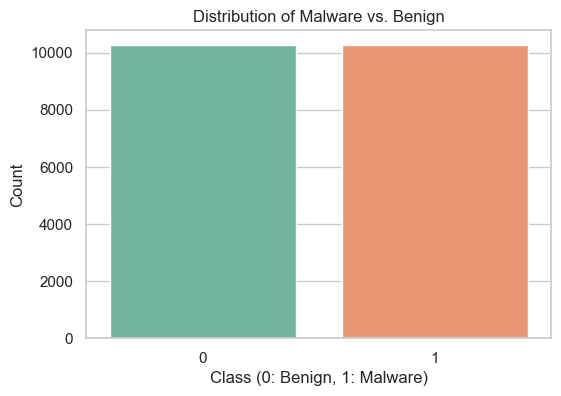

In [12]:
sns.set(style="whitegrid")  # Set the plot style

# Count the number of occurrences of each class (0 and 1)
class_counts = df_train['Result'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))  # Set the figure size
sns.barplot(x=class_counts.index, y=class_counts.values, palette="Set2")

# Set plot labels and title
plt.xlabel('Class (0: Benign, 1: Malware)')
plt.ylabel('Count')
plt.title('Distribution of Malware vs. Benign')

# Show the plot
plt.show()


In [13]:
check_result_distribution = df_train['Result'].map({0:'Benign', 1:'Malware'})
check_result_distribution.value_counts()

Benign     10270
Malware    10261
Name: Result, dtype: int64

## Investigate Column Distribution

📚 **Info**: Android permissions provide controls that increase user awareness and limit an app's access to sensitive data

🔑 **Ref** According to Paper, There are 2 type of android permission, _NATIVE PERMISSION_ and _CUSTOM PERMISSION_, 

* Native Permission usually declared as `android.permission.PERMISSION_NAME`
* Custom permission usually declared as `com.company.package.PERMISSION_NAME`
* In our case, there is permission declared as `me.com`

In [14]:
# List all columns from df_train which starts from "android.permission" in its name
native_permission = [column for column in df_train.columns if column.startswith('android.permission')]
custom_permission = [column for column in df_train.columns if column.startswith('com.')]
other_permission = [column for column in df_train.columns if column.startswith('me.')]

# Print the android_permission_columns list
print(f"Amount of Native Permission column: {len(native_permission)}")
print(f"Amount of Custom Permission column: {len(custom_permission)}")
print(f"Amount of Other Permission column: {len(other_permission)}")

df_permission_col = pd.DataFrame({'native_permission': [len(native_permission)], 
                                  'custom_permission': [len(custom_permission)], 
                                  'other_permission': [len(other_permission)]})


Amount of Native Permission column: 58
Amount of Custom Permission column: 26
Amount of Other Permission column: 2


In [15]:
df_train_native = df_train[native_permission + ['Result']]
df_train_custom = df_train[custom_permission + ['Result']]
df_train_other = df_train[other_permission + ['Result']]

In [16]:
def value_counts_summary(df):
    value_counts_dict = {}  # Dictionary to store value counts for each column
    
    for column in df.columns:
        value_counts = df[column].value_counts()
        value_counts_dict[column] = value_counts
    
    # Create a DataFrame from the value_counts dictionary
    value_counts_df = pd.DataFrame(value_counts_dict)
    
    # Transpose the DataFrame to have column names as the index
    value_counts_df = value_counts_df.transpose()
    
    # Add a new column for the total count
    value_counts_df['Total'] = value_counts_df.sum(axis=1)
    
    return value_counts_df

In [17]:
df_check_column_native = df_train[native_permission]
df_check_column_custom = df_train[custom_permission]
df_check_column_other = df_train[other_permission]


value_counts_df_native  = value_counts_summary(df_check_column_native)
value_counts_df_custom = value_counts_summary(df_check_column_custom)
value_counts_df_other  = value_counts_summary(df_check_column_other)

In [18]:
value_counts_df_custom

,0,1,Total
com.sonyericsson.home.permission.BROADCAST_BADGE,19819,712,20531
com.android.launcher.permission.READ_SETTINGS,20255,276,20531
com.google.android.providers.gsf.permission.READ_GSERVICES,19623,908,20531
com.huawei.android.launcher.permission.CHANGE_BADGE,20053,478,20531
com.oppo.launcher.permission.READ_SETTINGS,20159,372,20531
com.android.launcher.permission.INSTALL_SHORTCUT,16159,4372,20531
com.samsung.android.providers.context.permission.WRITE_USE_APP_FEATURE_SURVEY,20444,87,20531
com.majeur.launcher.permission.UPDATE_BADGE,19857,674,20531
com.htc.launcher.permission.READ_SETTINGS,19685,846,20531
com.anddoes.launcher.permission.UPDATE_COUNT,19848,683,20531


## Important Features

In [19]:
# Pearson 
correlation = df_train.corr()['Result'].sort_values(ascending=False)
correlation

Result                                                        1.000000
android.permission.READ_PHONE_STATE                           0.722723
android.permission.RECEIVE_BOOT_COMPLETED                     0.495459
com.android.launcher.permission.INSTALL_SHORTCUT              0.448761
android.permission.ACCESS_COARSE_LOCATION                     0.429481
                                                                ...   
com.sec.android.provider.badge.permission.WRITE              -0.188967
com.google.android.providers.gsf.permission.READ_GSERVICES   -0.196063
android.permission.READ_EXTERNAL_STORAGE                     -0.223433
com.android.vending.BILLING                                  -0.253654
com.google.android.c2dm.permission.RECEIVE                   -0.485609
Name: Result, Length: 87, dtype: float64

In [20]:
top_feature = correlation[correlation.values > 0].index
top_10_feature = correlation[:10]

df_train_top_10_feature = df_train[top_10_feature.index]
df_train_top_feature = df_train[correlation[correlation.values > 0].index]

top_10_feature

Result                                              1.000000
android.permission.READ_PHONE_STATE                 0.722723
android.permission.RECEIVE_BOOT_COMPLETED           0.495459
com.android.launcher.permission.INSTALL_SHORTCUT    0.448761
android.permission.ACCESS_COARSE_LOCATION           0.429481
android.permission.ACCESS_FINE_LOCATION             0.407464
android.permission.GET_TASKS                        0.385711
android.permission.SYSTEM_ALERT_WINDOW              0.326523
android.permission.WRITE_SETTINGS                   0.218067
android.permission.ACCESS_WIFI_STATE                0.209352
Name: Result, dtype: float64

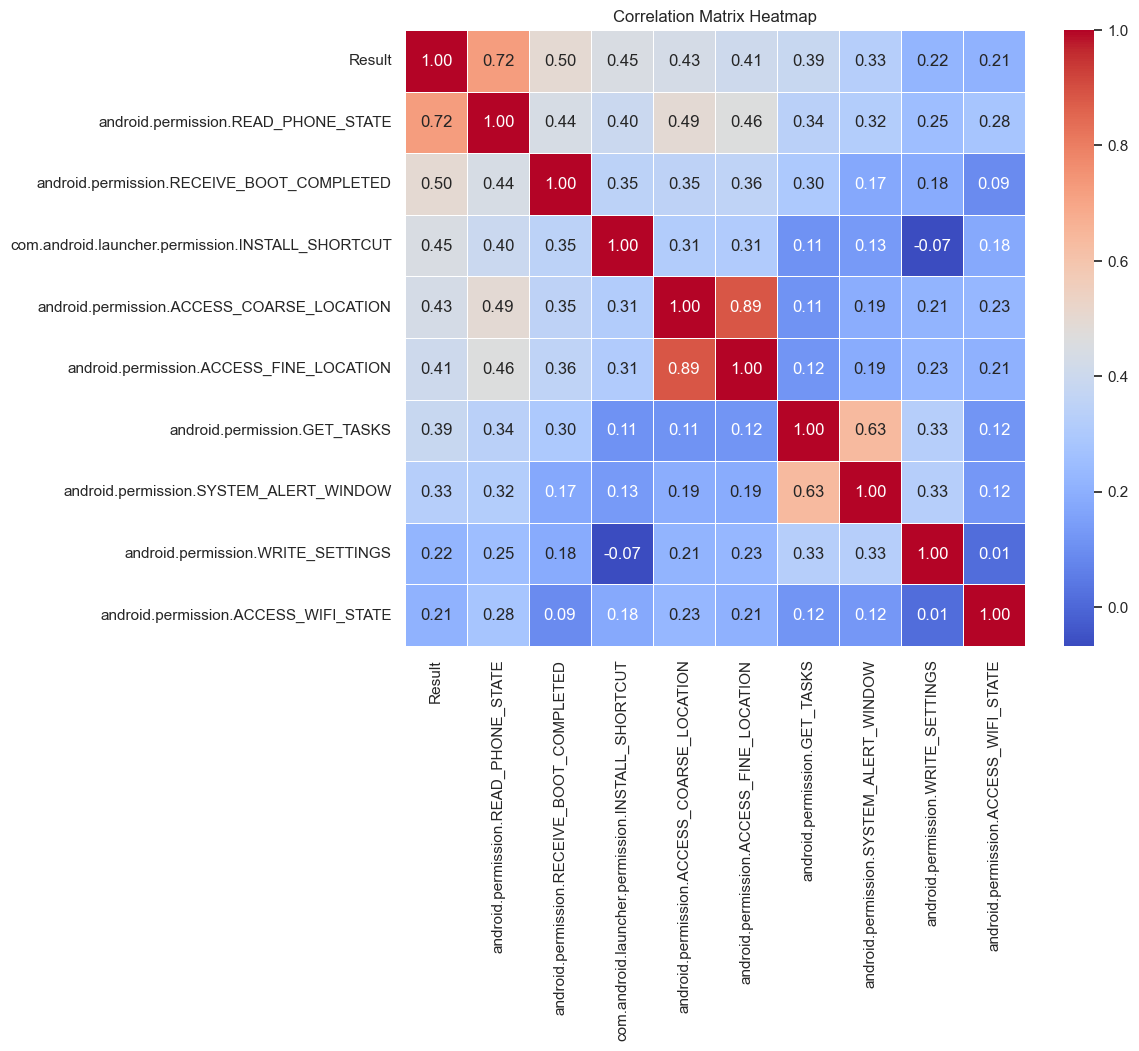

In [21]:
correlation_matrix = df_train_top_10_feature.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

C:\Users\user\anaconda3\envs\hppm\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


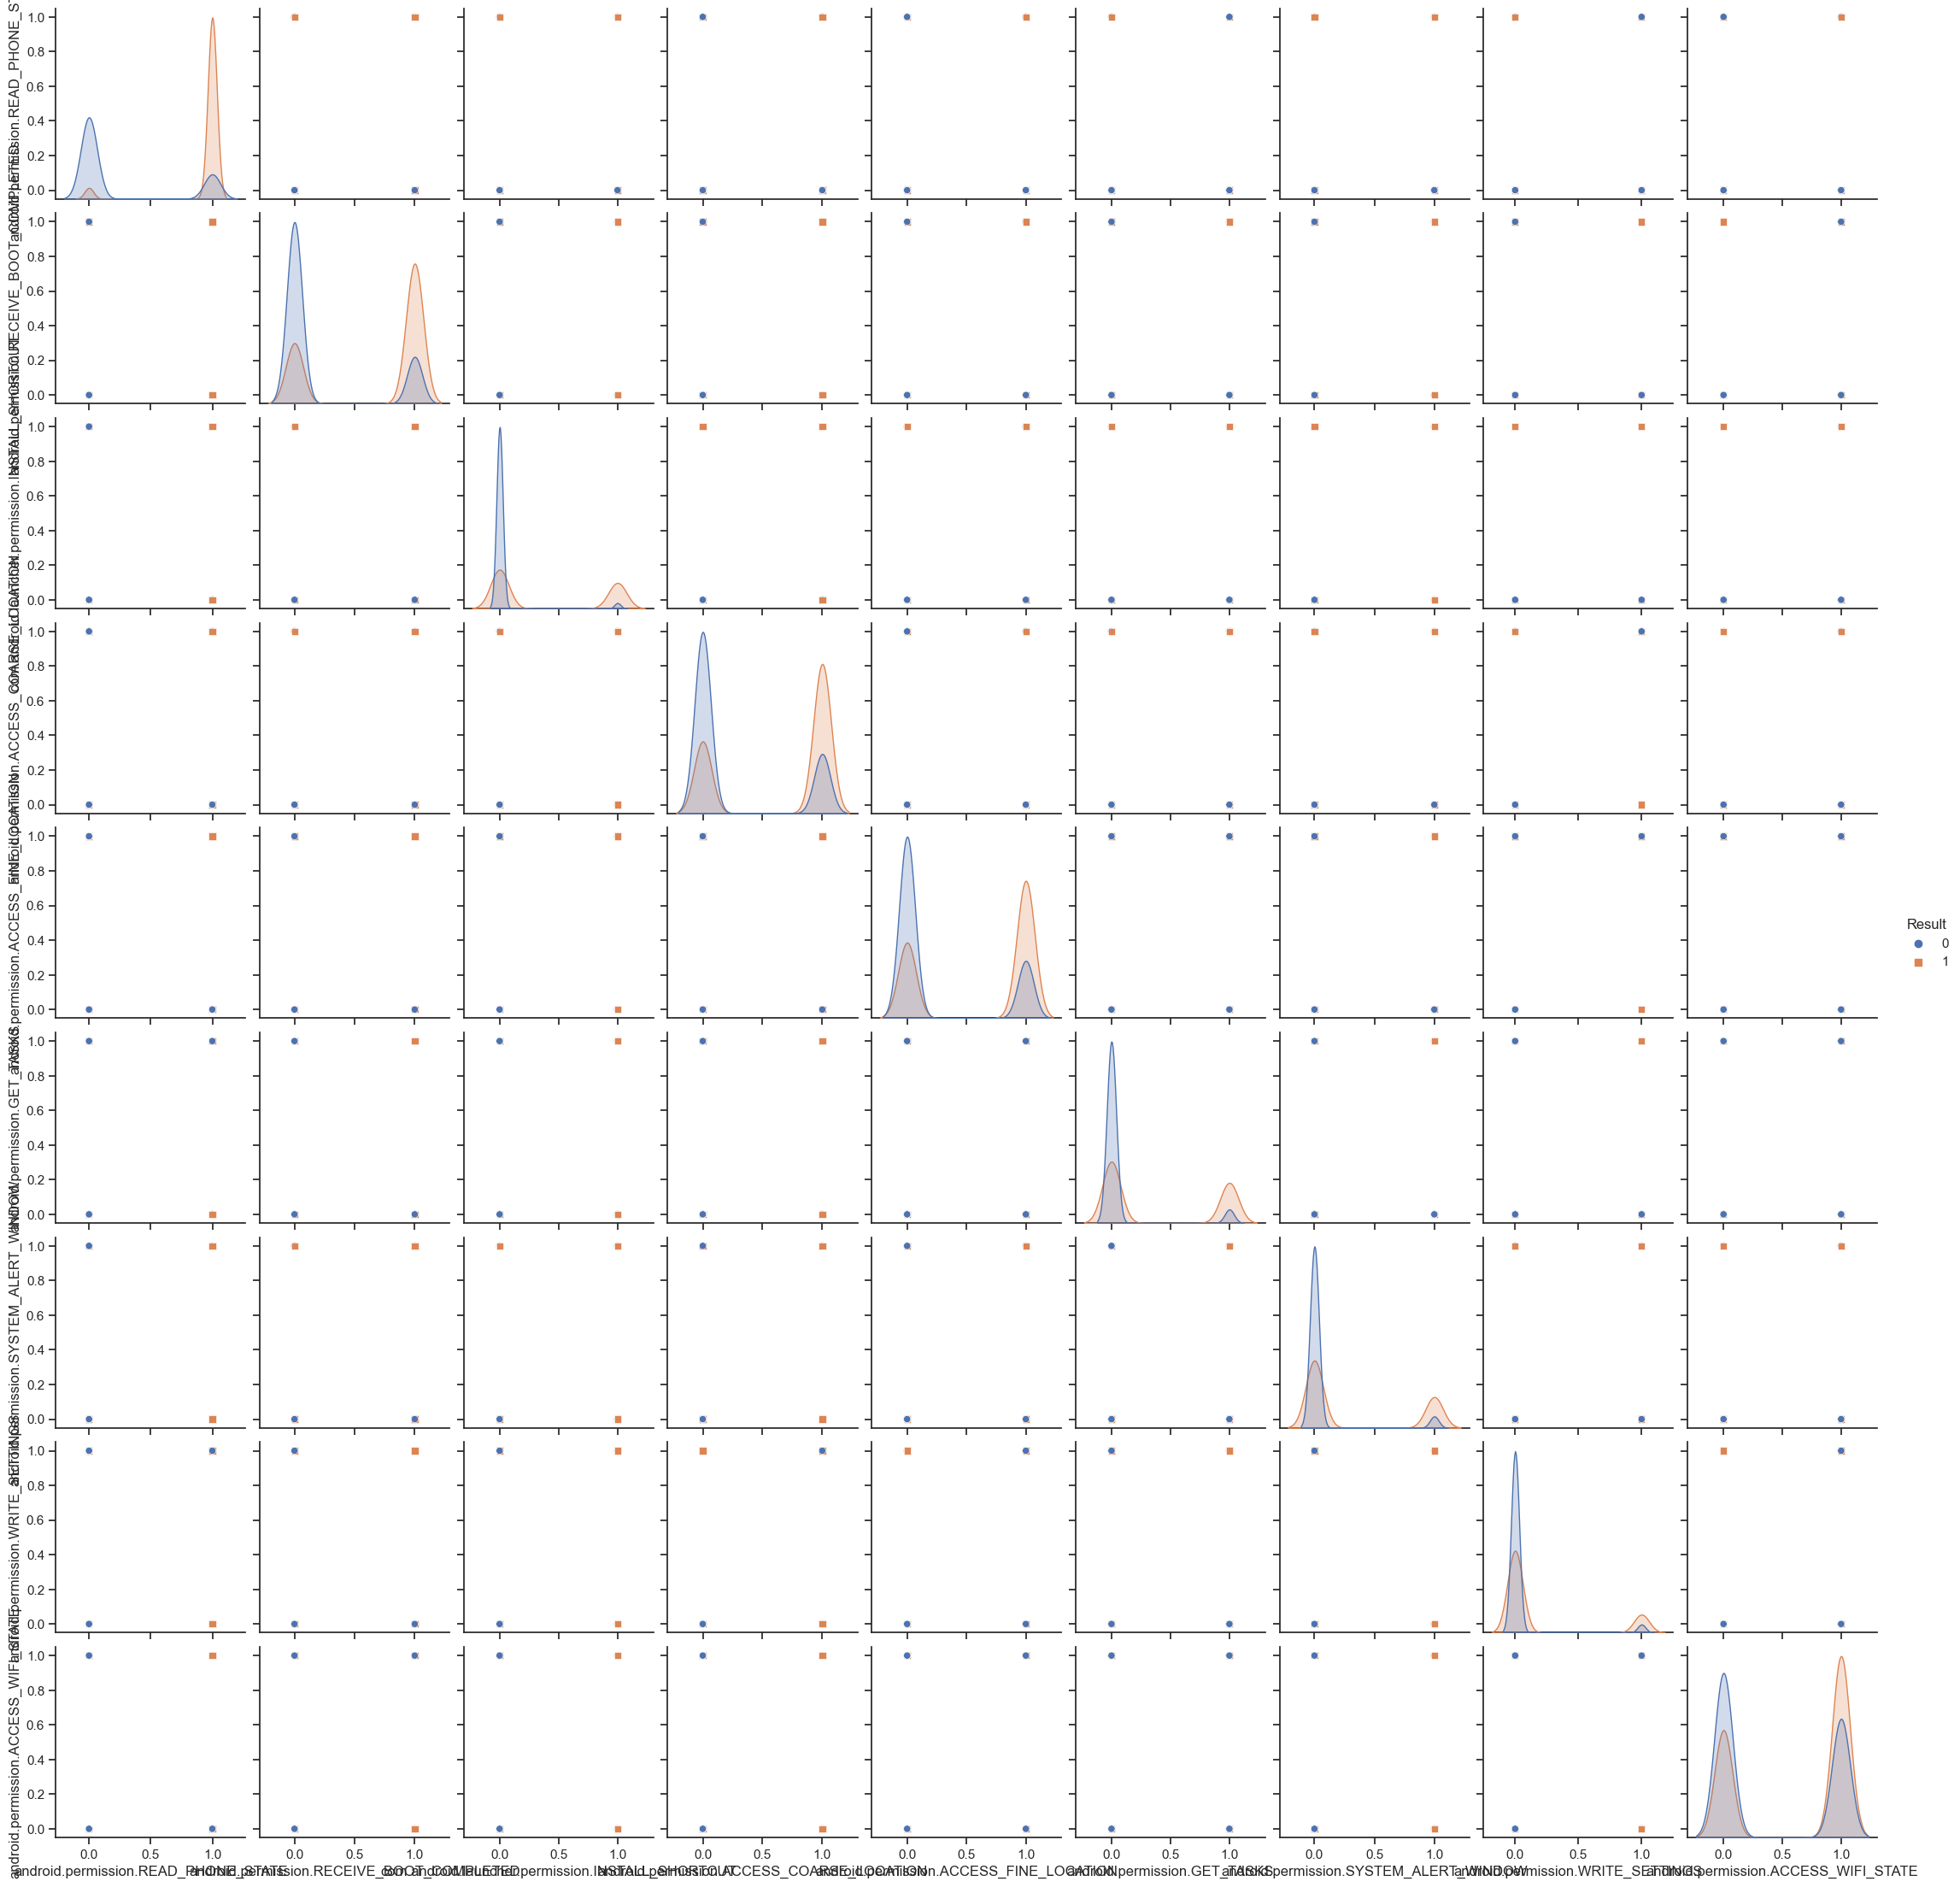

In [55]:
sns.set(style="ticks")
sns.pairplot(df_train_top_10_feature, hue="Result", markers=["o", "s"])

# Show the plot
plt.show()

In [33]:
# Create an estimator (e.g., RandomForestClassifier)
estimator = RandomForestClassifier()

# Create the RFE model
rfe = RFE(estimator, n_features_to_select=36)  # Specify the number of features to select

# Fit the RFE model and select the top K features
X_rfe = rfe.fit_transform(X, y)


In [34]:
# Get the ranking of features
feature_ranking = rfe.ranking_

In [36]:
# Assuming you have already fit the RFE model and have X_rfe
selected_features_mask = rfe.support_

# Get the indices of the selected features
selected_feature_indices = np.where(selected_features_mask)[0]

# Get the corresponding column names from X
selected_feature_names = X.columns[selected_feature_indices]

In [37]:
selected_feature_names

Index(['android.permission.READ_PHONE_STATE',
       'android.permission.RECEIVE_BOOT_COMPLETED',
       'com.android.launcher.permission.INSTALL_SHORTCUT',
       'android.permission.ACCESS_COARSE_LOCATION',
       'android.permission.ACCESS_FINE_LOCATION',
       'android.permission.GET_TASKS',
       'android.permission.SYSTEM_ALERT_WINDOW',
       'android.permission.WRITE_SETTINGS',
       'android.permission.ACCESS_WIFI_STATE'],
      dtype='object')

# Split Data Train

📝 : We have experienced with top features however, using the entire features are still better than that using top features.

In [22]:
X = df_train.drop('Result', axis=1)
y = df_train['Result']

len(X), len(y)

(20531, 20531)

In [23]:
# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
len(X_train), len(y_train), len(X_test), len(y_test)

(16424, 16424, 4107, 4107)

In [25]:
X_train.shape, y_train.shape

((16424, 86), (16424,))

# Modelling

## Helper Functions

In [38]:
def make_prediction(model, X_test, y_test):
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    report = classification_report(y_pred, y_test)
    print(f"[{type(model).__name__}] Accuracy: {accuracy}")
    print(report)

def plot_roc_curve(model, X_test, y_test, label=None):
    y_pred = model.predict(X_test)
    # Handle Deep Learning model
    if y_pred.ndim == 2:
        y_pred = y_pred
        y_pred = (y_pred > 0.5).astype(int)
        y_pred = y_pred.ravel()
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.legend()
    plt.xlabel('False Positive')
    plt.ylabel('True Positive')
    plt.title('ROC Curve')

## Base Model 1: RandomForest Classifier

🔑 Goals: a simple baseline classifier to compare against your model. We want to Create a pipeline that receives the data, trains the model, and then evaluates it 
using cross-validation

In [82]:
# Create and train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=0, n_estimators=100, oob_score=True, n_jobs=-1)

#Create a pipeline that standardizes, then runs Random Forest Classifier
pipeline = make_pipeline(rf_classifier)

# Create k-Fold cross-validation
kf = KFold(n_splits=20, shuffle=True, random_state=1)

# Conduct k-fold cross-validation
cv_results = cross_val_score(pipeline, # Pipeline
                             X_train, # Feature matrix
                             y_train, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="accuracy",
                             n_jobs=-1)# Loss function

In [83]:
# Train the best model on the entire training dataset
rf_model = pipeline.fit(X_train, y_train)

In [86]:
make_prediction(rf_model, X_test, y_test)

[Pipeline] Accuracy: 0.9717555393231069
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2102
           1       0.97      0.97      0.97      2005

    accuracy                           0.97      4107
   macro avg       0.97      0.97      0.97      4107
weighted avg       0.97      0.97      0.97      4107



## Model 2: Grid Search Random Forest

In [32]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [10, 15, 30], 'max_features': [4, 5, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [10, 20, 30], 'max_features': [40,50,60,86]},
 ]
forest_clf = RandomForestClassifier()
grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
 scoring='accuracy',
return_train_score=True)


In [33]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [4, 5, 6, 8],
                          'n_estimators': [10, 15, 30]},
                         {'bootstrap': [False],
                          'max_features': [40, 50, 60, 86],
                          'n_estimators': [10, 20, 30]}],
             return_train_score=True, scoring='accuracy')

In [34]:
grid_search.best_estimator_

RandomForestClassifier(max_features=5, n_estimators=30)

In [91]:
make_prediction(grid_search, X_test, y_test)

[GridSearchCV] Accuracy: 0.9712685658631605
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2106
           1       0.97      0.97      0.97      2001

    accuracy                           0.97      4107
   macro avg       0.97      0.97      0.97      4107
weighted avg       0.97      0.97      0.97      4107



## Model 3:  Support Vector Machines 

In [44]:
from sklearn.svm import SVC

In [51]:
svc_clf = SVC(kernel="poly", degree=2, coef0=1, C=5)

In [52]:
svc_clf.fit(X_train, y_train)

SVC(C=5, coef0=1, degree=2, kernel='poly')

In [53]:
make_prediction(svc_clf, X_test, y_test)

[SVC] Accuracy: 0.9663988312636961
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2096
           1       0.97      0.97      0.97      2011

    accuracy                           0.97      4107
   macro avg       0.97      0.97      0.97      4107
weighted avg       0.97      0.97      0.97      4107



## Model 4: Voting Classifier

In [106]:
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier()

voting_clf = VotingClassifier(
 estimators=[ ('rf', rf_model), ('gridrf', grid_search),('dt', dt_clf ), ('ada', ada_clf)],
 voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              Pipeline(steps=[('randomforestclassifier',
                                               RandomForestClassifier(n_jobs=-1,
                                                                      oob_score=True,
                                                                      random_state=0))])),
                             ('gridrf',
                              GridSearchCV(cv=5,
                                           estimator=RandomForestClassifier(),
                                           param_grid=[{'max_features': [4, 5,
                                                                         6, 8],
                                                        'n_estimators': [10, 15,
                                                                         30]},
                                                       {'bootstrap': [False],
                                                        'max_features': [40, 50,
                                                                         60,
                                                                         86],
                                                        'n_estimators': [10, 20,
                                                                         30]}],
                                           return_train_score=True,
                                           scoring='accuracy')),
                             ('dt', DecisionTreeClassifier()),
                             ('ada', AdaBoostClassifier())])

In [110]:
make_prediction(voting_clf, X_test, y_test)

[VotingClassifier] Accuracy: 0.9727294862429997
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2112
           1       0.97      0.98      0.97      1995

    accuracy                           0.97      4107
   macro avg       0.97      0.97      0.97      4107
weighted avg       0.97      0.97      0.97      4107



## Model 5: AdaBoost

In [73]:
# Create and train a Random Forest classifier
ada_clf = AdaBoostClassifier(
 DecisionTreeClassifier(max_depth=10), n_estimators=200,
 algorithm="SAMME.R", learning_rate=0.5)
#Create a pipeline that standardizes, then runs logistic regression
pipeline_ada = make_pipeline(ada_clf)

# Create k-Fold cross-validation
kf = KFold(n_splits=20, shuffle=True, random_state=1)

# Conduct k-fold cross-validation
cv_results = cross_val_score(pipeline_ada, # Pipeline
                             X_train, # Feature matrix
                             y_train, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="accuracy",
                             n_jobs=-1)# Loss function



In [74]:
ada_model = pipeline_ada.fit(X_train, y_train)

In [75]:
make_prediction(pipeline_ada, X_test, y_test)

[Pipeline] Accuracy: 0.9700511322132944
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2101
           1       0.97      0.97      0.97      2006

    accuracy                           0.97      4107
   macro avg       0.97      0.97      0.97      4107
weighted avg       0.97      0.97      0.97      4107



## Model 4: Deep Learning

In [111]:
def create_model_checkpoint(model_name, save_path='model_experiments'):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path , model_name),
                                            verbose=0,
                                            monitor='val_accuracy',
                                            save_best_only=True)

In [112]:
tf.random.set_seed(101)
dl_model = keras.Sequential([
    # Increase the number of neurons in the input layer
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),    
    # Output layer with sigmoid activation for binary classification
    keras.layers.Dense(1, activation='sigmoid')
],name='model_4_dense')

dl_model.compile(optimizer='adam', 
                 loss='binary_crossentropy', 
                 metrics=['accuracy']
                 )



In [113]:
dl_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[create_model_checkpoint(model_name=dl_model.name)])

test_accuracy = dl_model.evaluate(X_test, y_test)[1]

Epoch 1/20
510/514 [============================>.] - ETA: 0s - loss: 0.2496 - accuracy: 0.9204INFO:tensorflow:Assets written to: model_experiments\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_dense\assets


514/514 [==============================] - 3s 5ms/step - loss: 0.2494 - accuracy: 0.9207 - val_loss: 0.1340 - val_accuracy: 0.9554
Epoch 2/20
498/514 [============================>.] - ETA: 0s - loss: 0.1303 - accuracy: 0.9601INFO:tensorflow:Assets written to: model_experiments\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_dense\assets


514/514 [==============================] - 2s 4ms/step - loss: 0.1306 - accuracy: 0.9598 - val_loss: 0.1175 - val_accuracy: 0.9596
Epoch 3/20
514/514 [==============================] - 1s 3ms/step - loss: 0.1214 - accuracy: 0.9614 - val_loss: 0.1136 - val_accuracy: 0.9596
Epoch 4/20
506/514 [============================>.] - ETA: 0s - loss: 0.1176 - accuracy: 0.9620INFO:tensorflow:Assets written to: model_experiments\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_dense\assets


514/514 [==============================] - 2s 4ms/step - loss: 0.1172 - accuracy: 0.9622 - val_loss: 0.1116 - val_accuracy: 0.9613
Epoch 5/20
503/514 [============================>.] - ETA: 0s - loss: 0.1148 - accuracy: 0.9624INFO:tensorflow:Assets written to: model_experiments\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_dense\assets


514/514 [==============================] - 2s 4ms/step - loss: 0.1139 - accuracy: 0.9628 - val_loss: 0.1079 - val_accuracy: 0.9632
Epoch 6/20
514/514 [==============================] - 1s 3ms/step - loss: 0.1100 - accuracy: 0.9640 - val_loss: 0.1070 - val_accuracy: 0.9632
Epoch 7/20
504/514 [============================>.] - ETA: 0s - loss: 0.1073 - accuracy: 0.9655INFO:tensorflow:Assets written to: model_experiments\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_dense\assets


514/514 [==============================] - 2s 3ms/step - loss: 0.1071 - accuracy: 0.9656 - val_loss: 0.1053 - val_accuracy: 0.9645
Epoch 8/20
498/514 [============================>.] - ETA: 0s - loss: 0.1047 - accuracy: 0.9656INFO:tensorflow:Assets written to: model_experiments\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_dense\assets


514/514 [==============================] - 2s 3ms/step - loss: 0.1040 - accuracy: 0.9660 - val_loss: 0.1028 - val_accuracy: 0.9649
Epoch 9/20
509/514 [============================>.] - ETA: 0s - loss: 0.1021 - accuracy: 0.9663INFO:tensorflow:Assets written to: model_experiments\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_dense\assets


514/514 [==============================] - 2s 4ms/step - loss: 0.1016 - accuracy: 0.9666 - val_loss: 0.1009 - val_accuracy: 0.9652
Epoch 10/20
514/514 [==============================] - 1s 3ms/step - loss: 0.0994 - accuracy: 0.9671 - val_loss: 0.1003 - val_accuracy: 0.9649
Epoch 11/20
507/514 [============================>.] - ETA: 0s - loss: 0.0960 - accuracy: 0.9681INFO:tensorflow:Assets written to: model_experiments\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_dense\assets


514/514 [==============================] - 2s 3ms/step - loss: 0.0967 - accuracy: 0.9678 - val_loss: 0.0990 - val_accuracy: 0.9666
Epoch 12/20
514/514 [==============================] - 1s 3ms/step - loss: 0.0951 - accuracy: 0.9685 - val_loss: 0.1001 - val_accuracy: 0.9652
Epoch 13/20
495/514 [===========================>..] - ETA: 0s - loss: 0.0924 - accuracy: 0.9696INFO:tensorflow:Assets written to: model_experiments\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_dense\assets


514/514 [==============================] - 2s 4ms/step - loss: 0.0931 - accuracy: 0.9691 - val_loss: 0.0979 - val_accuracy: 0.9669
Epoch 14/20
496/514 [===========================>..] - ETA: 0s - loss: 0.0917 - accuracy: 0.9699INFO:tensorflow:Assets written to: model_experiments\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_dense\assets


514/514 [==============================] - 2s 4ms/step - loss: 0.0916 - accuracy: 0.9696 - val_loss: 0.0980 - val_accuracy: 0.9671
Epoch 15/20
514/514 [==============================] - 1s 3ms/step - loss: 0.0901 - accuracy: 0.9697 - val_loss: 0.0967 - val_accuracy: 0.9669
Epoch 16/20
514/514 [==============================] - 1s 3ms/step - loss: 0.0889 - accuracy: 0.9703 - val_loss: 0.0968 - val_accuracy: 0.9662
Epoch 17/20
500/514 [============================>.] - ETA: 0s - loss: 0.0885 - accuracy: 0.9703INFO:tensorflow:Assets written to: model_experiments\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_dense\assets


514/514 [==============================] - 2s 4ms/step - loss: 0.0879 - accuracy: 0.9705 - val_loss: 0.0965 - val_accuracy: 0.9676
Epoch 18/20
514/514 [==============================] - 2s 3ms/step - loss: 0.0866 - accuracy: 0.9707 - val_loss: 0.0955 - val_accuracy: 0.9666
Epoch 19/20
503/514 [============================>.] - ETA: 0s - loss: 0.0858 - accuracy: 0.9704INFO:tensorflow:Assets written to: model_experiments\model_4_dense\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_dense\assets


514/514 [==============================] - 2s 4ms/step - loss: 0.0856 - accuracy: 0.9707 - val_loss: 0.0952 - val_accuracy: 0.9683
Epoch 20/20
129/129 [==============================] - 0s 2ms/step - loss: 0.0953 - accuracy: 0.9669


In [114]:
# Load best performing model_1 and evaluate it on test data
dl_model = tf.keras.models.load_model(f'model_experiments/{dl_model.name}/')
dl_model.evaluate(X_test, y_test)

129/129 [==============================] - 0s 2ms/step - loss: 0.0952 - accuracy: 0.9683


[0.09522167593240738, 0.9683467149734497]

In [115]:
y_pred_dl = dl_model.predict(X_test)
y_pred_dl = (y_pred_dl > 0.5).astype(int)
y_pred_dl = y_pred_dl.ravel()

129/129 [==============================] - 0s 2ms/step


In [117]:
accuracy_score(y_pred_dl, y_test)

0.9683467251034819

# Model Evaluation

## ROC Curves

🔑 **Note** : The receiver operating characteristic (ROC) curve is another common tool used with 
binary classifiers. It is very similar to the precision/recall curve, but instead of plo
ting precision versus recall, the ROC curve plots the true positive rate (another na e
for recall) against the false positive rate.

129/129 [==============================] - 0s 1ms/step


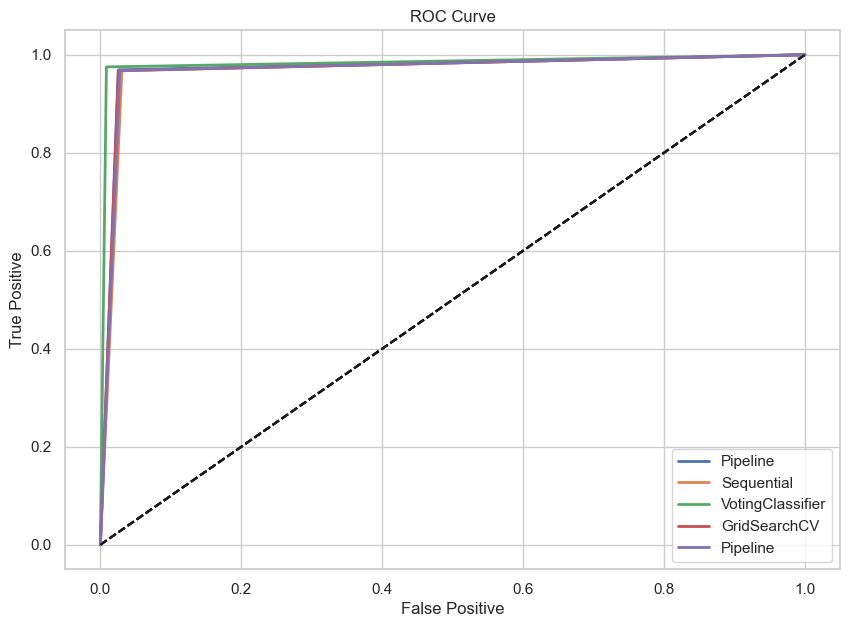

In [179]:
models = [rf_model, dl_model, voting_clf, grid_search, ada_model]

plt.figure(figsize=(10,7))
for model in models:
    plot_roc_curve(model, X_test, y_test, type(model).__name__)
plt.show()

## Confusion Matrix - Top Models

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


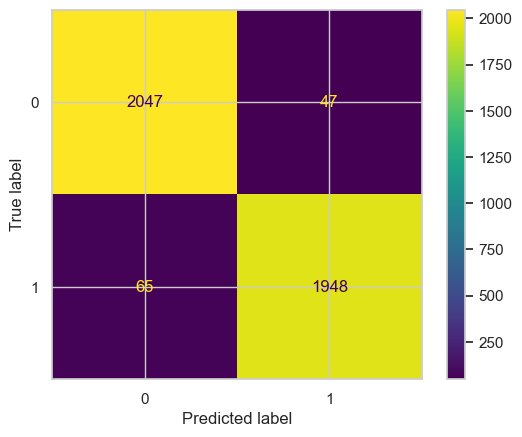

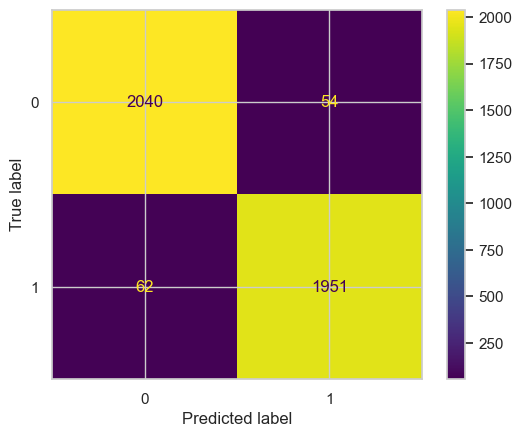

In [123]:
plot_confusion_matrix(voting_clf, X_test, y_test)
plot_confusion_matrix(rf_model, X_test, y_test)

# Model Recommendation

In this case, we experiments using multiple classification model plus 1 deep learning model.

Some consideration we can measure to pick the best model such as:

1️⃣ Choose the model that offers the best trade-off between precision, recall, F1-score, and accuracy.

Here, we know that the top performing models are RandomForest and Ensemble Model with Voting Classifier. From the Precision perspective, Ensemble Model slightly performs better than RandomForest meaning that it can corretly predict that Benign are belongs to Benign and so fort. Next, by looking at the confusion matrix Voting Classifier (up) has lower False Positive Rate than RandomForestClassifier (down). 



🔑 **Tips** Referring to book Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow` one method to chose the right model is to train multiple models with various hyperparameters 
on the reduced training set (i.e., the full training set minus the validation set), an 
you select the model that performs best on the validation setrror.

After this holdout validation process, you train the best model on the full training set (including the validation set), and this gives you the final model. Lastly, you evaluate this final model on the test set to get an estimate of the generalization error.

In [130]:
final_model = voting_clf.fit(X, y)

In [171]:
make_prediction(final_model, X, y)

[VotingClassifier] Accuracy: 0.9825629535823877
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     10412
           1       0.98      0.99      0.98     10119

    accuracy                           0.98     20531
   macro avg       0.98      0.98      0.98     20531
weighted avg       0.98      0.98      0.98     20531



# Prepare Submission Data

In [173]:
# Make evaluation prediction
pred = final_model.predict(df_test)

In [174]:
# Assigning predicted values to new 'Result' Column
df_test['Result'] = pred

In [175]:
df_test['Result']

0       1
1       1
2       0
3       0
4       1
       ..
8794    1
8795    1
8796    1
8797    1
8798    0
Name: Result, Length: 8799, dtype: int64

In [176]:
# Create new DataFrame following the submission guideline saving only 'Result'
df_submit = pd.DataFrame({'index': df_test.index, 'Result': df_test['Result']})

In [177]:
df_submit

,index,Result
0,0,1
1,1,1
2,2,0
3,3,0
4,4,1
...,...,...
8794,8794,1
8795,8795,1
8796,8796,1
8797,8797,1


In [178]:
# Save to Csv
df_submit.to_csv('submission.csv', index=False)